# Logisitic Regression
---




In [1]:
import numpy as np

In [2]:
from sklearn import datasets
iris_dataset = datasets.load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## A) Train/Test Split

<div dir='rtl'>

در این بخش شما باید مجمموعه ی داده را به دو بخش آموزش و ارزیابی  تقسیم کنید. ۸۰ درصد داده‌ها را برای آموزش و باقی را برای ارزیابی بگذارید.
فراموش نکنید که قبل از تقسیم داده آن‌ها را بر بزنید.

</div>

In [3]:
np.random.seed(888)

In [4]:
x = iris_dataset.data
y = iris_dataset.target
train_ratio = 0.8

In [5]:
##################
# Train/Test Split
##################
x_train, y_train = None, None
x_test, y_test = None, None
## Your Code Starts Here ##
a = np.random.permutation(x.shape[0])
x = x[a]
y = y[a]
train_sz = int(0.8 * x.shape[0])
x_train = x[:train_sz]
x_test = x[train_sz:]
y_train = y[:train_sz]
y_test = y[train_sz:]
#x_train.shape, y_train.shape, x_test.shape, y_train.shape
## Your Code Ends Here ##

## B) Softmax

<div dir='rtl'>

در این بخش از شما خواسته شده تابع
softmax
را پیاده‌سازی کنید. از این تابع برای محاسبه‌ی احتمال پیش‌بینی شده برای هر کلاس استفاده می‌شود.

$$
softmax(v) = \frac{1}{\sum_{k=1}^{K} e^{v_k}}
\begin{bmatrix}
e^{v_1} \\
e^{v_2} \\
... \\
e^{v_k}
\end{bmatrix}
$$

که در رابطه‌ی بالا
K
تعداد کلاس‌هاست و
$v_k = w_k^Tx$
</div>

In [6]:
##################
# Softmax Function
##################
# X is  (N, d + 1) where d is number of features (one for bias) and n is number of data .
# W is (d + 1, K) where d is number of features (one for bias) and K is number of classes.
def softmax(X, W):
  preds = None
  ## Your Code Starts Here ##
  K = W.shape[1]
  N = X.shape[0]
  preds = np.zeros((N, K))

  for j in range(N):
    preds[j] = (W.T) @ X[j]
    preds[j] = np.exp(preds[j])

    S = preds[j].sum()
    preds[j] /= S
  ## Your Code Ends Here ##
  return preds

## C) Predictions

<div dir='rtl'>
  
در این بخش به دنبال پیاده‌سازی تابعی هستیم که با گرفتن احتمال‌های پیش‌بینی شده بازای هر کلاس، کلاسی را که داده‌ به آن تعلق دارد پیش‌بینی کند.

</div>

In [7]:
#####################
# Prediction Function
#####################
# preds: predicted probabilities (N, K)
def return_predicted_classes(preds):
  predicted_y = None
  ## Your Code Starts Here ##
  N = preds.shape[0]
  K = preds.shape[1]
  predicted_y = preds.argmax(axis=1)
  ## Your Code Ends Here ##
  return predicted_y

## C) Loss Function

<div dir='rtl'>

در گام بعد با داشتن احتمال تعلق هر داده به هر کلاس از طریق تابع
softmax
به دنبال محاسبه‌ی تابع هزینه هستیم.

$$
loss(X, Y;w) = - \sum_{i=1}^N \sum_{k=1}^K \mathbb{I}[y_i = k]\; log \frac{e^{w_k^Tx}}{\sum_{j=1}^K e^{w_j^Tx}}
$$

</div>

In [8]:
###############
# Loss function
###############
# y: (N)
# preds: class probabilities (N, K)
def logistic_loss(y, preds):
  loss = None
  ## Your Code Starts Here ##
  loss = 0
  N = y.shape[0]
  K = preds.shape[1]
  for i in range(N):
    loss -= np.log(preds[i][y[i]])
    #for k in range(K):
      #if (y[i] == k):
        #loss += np.log(preds[i][k])
  loss /= y.shape[0]
  ## Your Code Ends Here ##
  return loss

## D) Weight Updates

<div dir='rtl'>

در این بخش باید رابطه‌ی بروزرسانی وزن‌ها در لاجستیک رگرشن را پیاده‌سازی کنید. این رابطه برای وزن کلاس kام
$w_k$
به صورت زیر است.

$$
w_k \leftarrow w_k - \alpha (\hat{y_i} - y_i) x_i
$$

که در آن
$\alpha$
نرخ یادگیری ،
$\hat{y_i}$
مقدار احتمال پیش‌بینی برای داده‌ی iام
و
$x_i$
داده‌ی iام هستند.

راهنمایی: فراموش نکنید که باید از میانگین گرادیان روی همه‌ی داده‌ها استفاده کنید.

</div>

In [9]:
#####################################
# Implementing weight update function
#####################################
# W: (d+1, K)
# X: (N, d+1)
# y: (N, 1)
# preds: predicted probability for each class (N, K)
# alpha: learning rate
def update_weights(W, X, y, preds, alpha):
  new_W = None
  ## Your Code Starts Here ##
  new_W = W.T.copy()
  N = X.shape[0]
  K = W.shape[1]
  for i in range(N):
   for k in range(K):
      y_ki = (y[i] == k)
      new_W[k] -= alpha * (preds[i][k] - y_ki) * X[i] / N
  new_W = new_W.T
  ## Your Code Ends Here ##
  return new_W

## E) Logistic Regression

<div dir='rtl'>

در این بخش شما باید الگوریتم لاجستیگ رگرشن را بوسیله‌ی توابعی که در بخش‌های پیشین پیاده‌سازی کردید، پیاده‌سازی کنید.

دقت کنید که موارد زیر را حتما خروجی دهید:

1. میزان تابع هزینه بازای هر ایپاک بر روی داده‌ی آموزش و تست
2. خروجی نهایی مدل روی داده‌ی آموزش و تست

</div>

In [10]:
##############################
# Logistic Regression Function
##############################
# your output should include:
# 1. train/test losses during training
# 2. final predictions on train/test sets
def logistic_regression(x_train, y_train, x_test, y_test,  n_classes, n_iteration, alpha):
  train_losses, test_losses = None, None
  train_preds, test_preds = None, None
  ## Your Code Starts Here ##
  train_losses = np.array([])
  test_losses = np.array([])

  K = n_classes
  W = np.zeros((x_train.shape[1] + 1, K))
  N = x_train.shape[0]

  x_train = np.hstack((x_train, np.ones(x_train.shape[0])[:, np.newaxis]))
  x_test = np.hstack((x_test, np.ones(x_test.shape[0])[:, np.newaxis]))

  for t in range(n_iters):
    preds = softmax(x_train, W)
    W = update_weights(W, x_train, y_train, preds, alpha)

    test_losses = np.append(test_losses, logistic_loss(y_test, softmax(x_test, W)))
    train_losses = np.append(train_losses, logistic_loss(y_train, softmax(x_train, W)))

  train_preds = return_predicted_classes(softmax(x_train, W))
  test_preds = return_predicted_classes(softmax(x_test, W))

  ## Your Code Ends Here ##
  return train_losses, test_losses, train_preds, test_preds

In [11]:
##########################
# Run logistic Regression
#########################
# if you implement the code efficiently it should not take more than
# a second to run!
n_classes = 3
#n_iters = 10000
n_iters = 1000

alpha = 0.01

train_losses, test_losses, train_preds, test_preds = logistic_regression(
    x_train,
    y_train,
    x_test,
    y_test,
    n_classes,
    n_iters,
    alpha
)

## F) Plot train/test losses

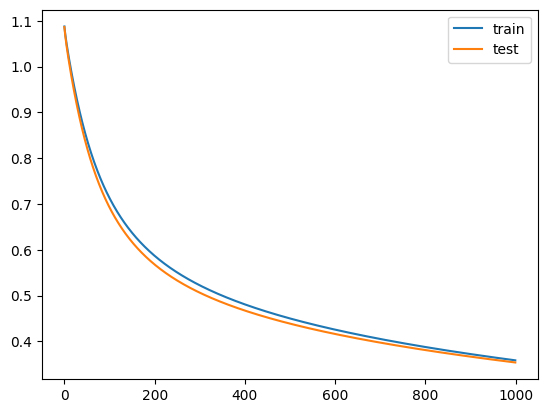

In [12]:
########################
# Plot train/test losses
########################

from matplotlib import pyplot as plt

## Your Code Starts Here ##
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
## Your Code Ends Here ##

## G) Train/Test Accuracy

In [13]:
###########################
# print train/test accuracy
###########################
## Your Code Starts Here ##
def acc(y_hat, y):
  return np.mean(y_hat == y)
  #y_dif = y_hat != y
  #return 1.0 - y_dif.sum() / y.size
print(acc(train_preds, y_train))
print(acc(test_preds, y_test))

## Your Code Ends Here ##

0.975
0.9666666666666667


## H) Confusion Matrix

<div dir='rtl'>

در این بخش از شما می‌خواهیم تا ماتریس درهم‌ریختگی را برای پیش‌بینی‌های مدل خود بدست آورید.

</div>

In [14]:
##################
# Confusion Matrix
##################
# preds: predicted classes (N,)
# true: labels (N,)
def get_confusion_matrix(preds, true):
  confusion_matrix = None
  ## Your Code Starts Here ##

  confusion_matrix = np.zeros((3, 3))
  N = preds.shape[0]
  for i in range(N):
    confusion_matrix[int(preds[i])][int(true[i])] += 1
  ## Your Code Ends Here ##
  return confusion_matrix

In [15]:
#####################################
# Print Train/Test Confusion Matrices
#####################################
## Your Code Starts Here ##
print(get_confusion_matrix(train_preds, y_train))
print(get_confusion_matrix(test_preds, y_test))

## Your Code Ends Here ##

[[40.  0.  0.]
 [ 0. 40.  0.]
 [ 0.  3. 37.]]
[[10.  0.  0.]
 [ 0.  7.  1.]
 [ 0.  0. 12.]]


## Scikit Learn Version

<div dir='rtl'>


</div>

Define Model

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression();

Train Model

In [17]:
model.fit(x_train, y_train)

LogisticRegression()

Predict Tests

In [18]:
y_pred = model.predict(x_test);

Print Accuracy

In [19]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  7  0]
 [ 0  1 12]]


Visual Confusion Matrix

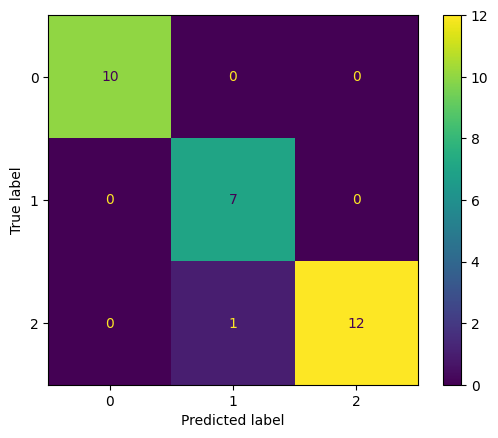

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Perceptron

Reload Dataset

In [22]:
from sklearn import datasets
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target
X.shape, y.shape

((150, 4), (150,))

Split Train Test Using SKlearn

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = None, None, None, None
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=888)

Use Standard Scaler (OPTIONAL)

Get Predicted Class from Logits (Last Layer)

In [24]:
#returns (num_samples, num_class) vector
def get_logits(x, W, b):
  ##Your code here
  return x @ W.T + b;

In [25]:
#returns (num_samples,) vector
#returns predicted class for each sample
def get_predict(x, W, b):
  A = get_logits(x, W, b)
  return np.argmax(get_logits(x, W, b), axis=1)

In [26]:
def perceptron_train(x_train, y_train, n_classes, n_iteration, alpha):
  ## Your Code Starts Here ##

  K = n_classes
  W = np.zeros((K, x_train.shape[1]))
  b = np.zeros(K)
  N = x_train.shape[0]


  for t in range(n_iters):
    for Xi, yi in zip(X_train, y_train):
      pred = get_predict(Xi[np.newaxis, :], W, b)

      if yi != pred:
        W[yi] += alpha * Xi
        W[yi] += alpha
        W[pred] -= alpha * Xi
        W[pred] -= alpha
  return W, b

In [27]:
##########################
# Run Model
#########################
# if you implement the code efficiently it should not take more than
# a second to run!
n_classes = 3
n_iters = 1000

alpha = 0.01

W, b = perceptron_train(
    X_train,
    y_train,
    n_classes,
    n_iters,
    alpha
)

Predict Test Data

In [28]:
y_hat = get_predict(X_test, W, b)
y_hat

array([1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       0, 1, 2, 2, 1, 0, 0, 0])

Accuracy Test

In [29]:
acc(y_hat, y_test)

np.float64(0.9333333333333333)

Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[ 9  0  0]
 [ 0 11  1]
 [ 0  1  8]]
